<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/a/aa/Logo_DuocUC.svg/2560px-Logo_DuocUC.svg.png' width=50%, height=20%>

Informe Tecnico


Integrantes:  Pamela Aldana
              Jacknel Bernard


#**Contexto del caso Forma A**.

Deberá ser capaz de implementar un proyecto de Deep Learning, entrenando un modelo ajustado a partir de los datos entregados
para este caso. Desarrollará el proyecto utilizando las etapas de metodología CRISP.DM, para la toma de las mejores decisiones
de la ejecución del proyecto.<br>
Este caso propone la utilización de Deep Learning para la clasificación de imágenes de prendas de vestir.<br>
Para contextualizar el caso, las empresas de moda han utilizado Deep Learning en su comercio electrónico para resolver muchos
problemas, como el reconocimiento de ropa, la búsqueda de ropa y la recomendación. <br>Un paso central para todas estas
implementaciones es la clasificación de imágenes. <br>Sin embargo, la clasificación de la ropa es una tarea desafiante ya que la ropa
tiene muchas propiedades y la profundidad de la categorización de la ropa es muy complicada.<br><br>
Para este caso utilizaremos un conjunto de datos denominado Fashion-MNIST, <br>Tiene  de imágenes en escala de grises de baja resolucion (28X28)pixeles
<br>70 000 productos de moda de 10 categorías, con 7000 imágenes por categoría.<br> El conjunto de entrenamiento tiene 60 000
imágenes y el conjunto de prueba tiene 10 000 imágenes. <br>Fashion-MNIST está destinado a servir como un reemplazo directo del
conjunto de datos MNIST original para comparar algoritmos de aprendizaje automático, ya que comparte el mismo tamaño de
imagen, formato de datos y la estructura de las divisiones de entrenamiento y prueba. El conjunto de datos está disponible
gratuitamente en https://github.com/zalandoresearch/fashion-mnist.

#FASE 1 :COMPRENDER EL NEGOCIO

Utilizaremos Tensor Flow  junto a Keras para programar varias Redes Neuronales  con el fin de predecir imágenes de ropa que estan clasificadas en 10 clases que son : 'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot. Para esto vamos a disponer del Fashion MNIST dataset. Este dataset está separado en 60000 imágenes de entrenamiento y 10000 para el test,los cuales pueden ser obtenidos desde el tf.keras.


#FASE 2 :COMPRENDER LOS DATOS

## Importar librerías

In [13]:
!pip install tensorflow

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import  Dense, Flatten, MaxPool2D  # capz entradas , ocultas, salidas
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras import models
from sklearn.manifold import TSNE

##Carga de datos Fashion MNIST

In [36]:
# Cargar el conjunto de datos Fashion MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist

# Setamos los seed para números random

#np.random.seed(30)
#tf.random.set_seed(30)

# Carga los datos en conjuntos de entrenamiento y prueba
(train_imagen, train_labels), (test_imagen, test_labels) = fashion_mnist.load_data()

# Define las etiquetas de las clases
clases = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


# Mostrar información sobre el conjunto de datos
print("Número de datos de entrenamiento:", len(train_imagen))
print("Número de datos de prueba:", len(test_imagen))
print("Forma  los de entrenamiento:", train_imagen[0].shape)
print("Categorias en la dataset:", np.unique(train_labels))
print("Clases:", clases)

Número de datos de entrenamiento: 60000
Número de datos de prueba: 10000
Forma  los de entrenamiento: (28, 28)
Categorias en la dataset: [0 1 2 3 4 5 6 7 8 9]
Clases: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [37]:
print(train_labels[:10])


[9 0 0 3 0 2 7 2 5 5]


In [38]:
print(test_labels[:10])


[9 2 1 1 6 1 4 6 5 7]


Las etiquetas de las clases van de 0 a 9 , lo que significa que hay 10 tipos diferentes de ropa

#FASE 3 PREPARACION DE LOS DATOS

##Preprocesamiento de datos

El set de datos debe ser pre-procesada antes de entrenar la red.

In [39]:
# Normalizar los valores de píxeles de las imágenes
train_imagen, test_imagen = train_imagen / 255.0, test_imagen / 255.0

Se normalizan estos valores en un rango de 0 a 1 antes de utilizar el modelo de la red neuronal.

## Grafica de una  imagen con su etiqueta

Podemos visualizar una imagen del dataset

Se visualiza la imagen en el set de entrenamiento, va a encontrar que los valores de los pixeles estan entre 0 y 255:

label: T-shirt/top


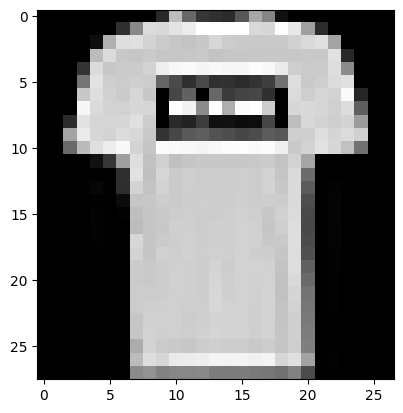

In [40]:
i=1
img = train_imagen[i,:,i:]
plt.imshow(img, cmap='gray')
plt.show
print(f"label: {clases[train_labels[i]]}")


Para verificar que el set de datos esta en el formato adecuado y que estan listos para construir y entrenar la red, vamos a desplegar las primeras 25 imagenes de el train_imagen  junto con el nombre de cada clase en cada imagen

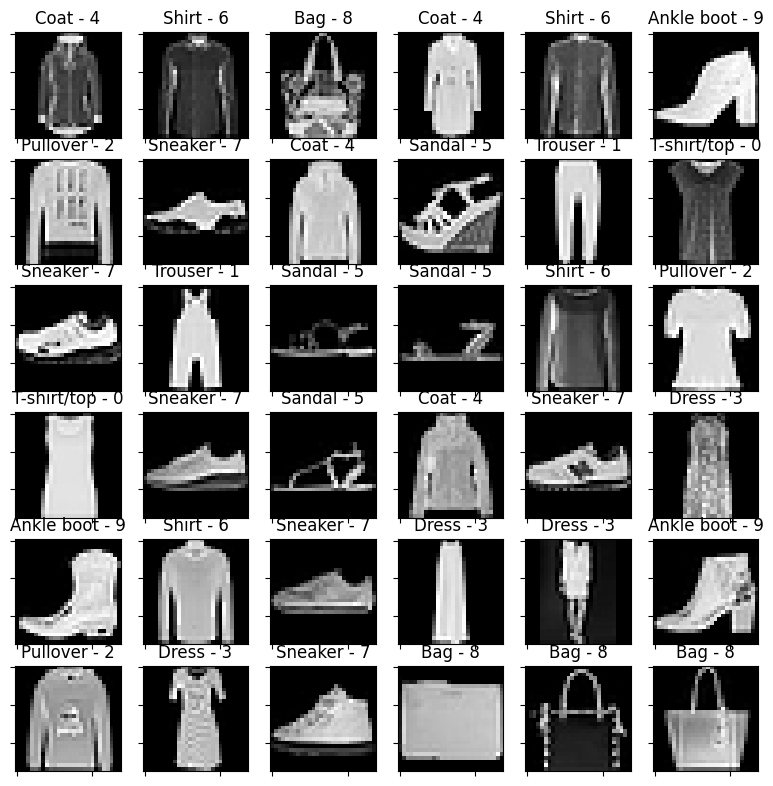

In [41]:
# Define las etiquetas de las clases
clases = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Mostramos una grilla de ejemplos (al azar)
h = 6 # alto de la grilla
w = 6 # ancho de la grilla
fig, axs = plt.subplots(h, w, figsize=(1.6*h, 1.6*w))
for i in range(h):
    for j in range(w):
        ex = np.random.randint(len(train_imagen))
        axs[i,j].set_title(clases[train_labels[ex]] + " - " + str(train_labels[ex]))
        axs[i,j].grid(False)
        axs[i,j].set_xticklabels([])
        axs[i,j].set_yticklabels([])
        axs[i,j].imshow(train_imagen[ex], cmap='gray')
plt.show()


Se puede observar que las etiquetas  de las clases se no se asignaron correctamente,  ya que varias imágenes no corresponden a las categorías esperadas.

#FASE 4 MODELADO

Construir la red neuronal requiere configurar las capas del modelo y luego compilar el modelo.


# Modelo Perceptrón

Se crea un modelo que consiste en una sola unidad de procesamiento llamada perceptrón, que toma varias entradas , las pondera y las combina linealmente, y luego aplica una función de activación sigmoide para producir una salida. La función de pérdida se establece en 'binary_crossentropy' para problemas de clasificación binaria, y el modelo se entrena con los datos de entrenamiento. Luego, se evalúa el modelo con los datos de prueba para obtener la precisión en la clasificación.

##Primer modelo 1 Perceptron

**Definir el modelo**

In [ ]:
# Definir el modelo del perceptrón
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Flatten(input_shape=(28, 28)),              # capa de aplanamiento.aplanar la imagen 28x28 a un vector de 784 elementos y sesgo 1
    Dense(1, activation='sigmoid')])                 # Capa de salida con una neurona y función de activación sigmoid


**Flatten:** Se utiliza para convertir las imágenes de 28x28 píxeles en un vector de 784 elementos antes de pasarlos a la capa densa (o de perceptrón) del modelo. <br>**Dense:** Esta es una capa totalmente conectada (dense) con un solo perceptrón.Produce una salida de un solo valor. La función de activación es la sigmoide. Tiene 785(28x28) parámetros, que son los pesos de conexión de cada píxel de entrada con el perceptrón más 1 sesgo adicional.
<br> **Total params:** Muestra el número total de parámetros en el modelo, hay 785 parámetros en total.
<br>**Trainable params:** Indica el número de parámetros que se pueden entrenar durante el proceso de entrenamiento, todos los parámetros son entrenables<br>

**Compilar el modelo**

In [ ]:
# Compilar el modelo
model.compile(optimizer='sgd',                              # Su función principal es ajustar los pesos del modelo durante el entrenamiento para minimizar la función de pérdida.
              loss='binary_crossentropy',                  # Utilizamos binary_crossentropy ya que es un problema de clasificación binaria
              metrics=['accuracy'])
                      # mide la exactud del modelo
# resumen Arquitectura
model.summary()
# optimizador sgd..Su función principal es ajustar los pesos del modelo durante el entrenamiento para minimizar la función de pérdida.



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1)                 785       
                                                                 
Total params: 785 (3.07 KB)
Trainable params: 785 (3.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Entrenamiento del modelo**

In [ ]:
 #Entrenamiento del modelo

h=model.fit(train_imagen, train_labels, epochs=20, batch_size=32)




Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: -438087.4688 - accuracy: 0.1000
Epoch 2/20
1875/1875 [==============================] - 3s 1ms/step - loss: -459457.5625 - accuracy: 0.1000
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: -480828.2812 - accuracy: 0.1000
Epoch 4/20
1875/1875 [==============================] - 3s 1ms/step - loss: -502198.5938 - accuracy: 0.1000
Epoch 5/20
1875/1875 [==============================] - 3s 1ms/step - loss: -523569.1875 - accuracy: 0.1000
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: -544939.8750 - accuracy: 0.1000
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: -566310.5625 - accuracy: 0.1000
Epoch 8/20
1875/1875 [==============================] - 3s 1ms/step - loss: -587680.6250 - accuracy: 0.1000
Epoch 9/20
1875/1875 [==============================] - 3s 1ms/step - loss: -609051.3750 - accuracy: 0.1000
Epoch 10/20
1875/1875 [=====

**Evaluación del modelo**

In [ ]:
test_loss, test_acc = model.evaluate(test_imagen, test_labels)
print('Exactitud en los datos de prueba:', test_acc)
print('Perdida en los datos de prueba:', test_loss)

313/313 [==============================] - 1s 2ms/step - loss: -855533.1250 - accuracy: 0.1000
Exactitud en los datos de prueba: 0.10000000149011612
Perdida en los datos de prueba: -855533.125


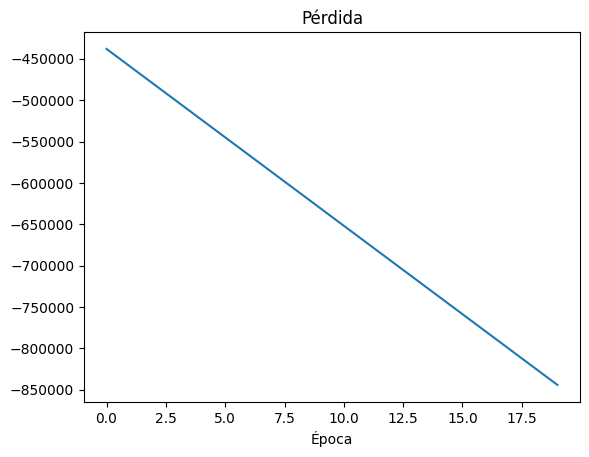

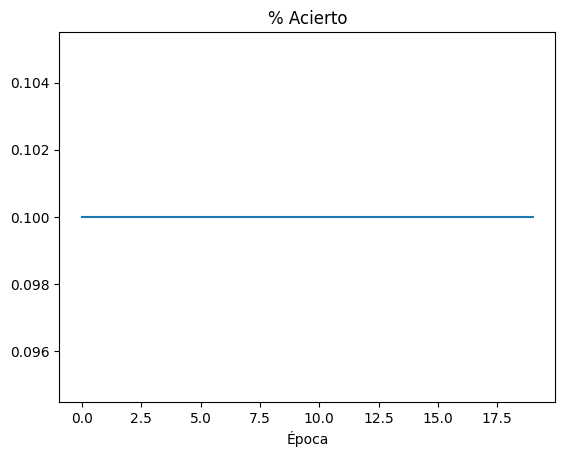

In [ ]:
# imprime la pérdida para cada época

plt.plot(h.history['loss'])
plt.title('Pérdida')
plt.xlabel('Época')
plt.show()
# imprime el porcentaje de acierto para cada época

plt.plot(h.history['accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')
plt.show()

Conclusion: <br>*
* El modelo clasificó correctamente alrededor del 10% de las muestras del conjunto de datos de prueba lo que es muy baja.
* La pérdida en los datos de prueba es  negativa, lo que indica un problema,  ya que representa la diferencia entre las predicciones del modelo y los valores reales.

##Segundo modelo de un perceptron

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Define el modelo del perceptrón con una neurona en la capa de salida
model = Sequential([
    Flatten(input_shape=(28, 28)),              # Flatten the 28x28 image into a 784-element vector
    Dense(1, activation='sigmoid')             # Output layer with 10 neurons for the 10 classes and softmax activation
])

# Compila el modelo
model.compile(optimizer='adam',                  # Stochastic Gradient Descent optimizer
              loss='binary_crossentropy' ,   # Sparse categorical cross-entropy loss for multi-class classification
              metrics=['accuracy'])               # Accuracy metric to monitor during training

# Muestra un resumen de la arquitectura del modelo
model.summary()

# Entrena el modelo
model.fit(train_imagen, train_labels, epochs=20, batch_size=32)

# Evalúa el modelo
test_loss, test_acc = model.evaluate(test_imagen, test_labels)
print('Exactitud en los datos de prueba:', test_acc)
print('Pérdida en los datos de prueba:', test_loss)


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 1)                 785       
                                                                 
Total params: 785 (3.07 KB)
Trainable params: 785 (3.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: -5.5733 - accuracy: 0.1000
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: -17.4488 - accuracy: 0.1000
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: -29.3025 - accuracy: 0.1000
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: -41.2295 - accuracy: 0.1000
Epoch

La precisión es de aproximadamente 0.1, lo que significa que el modelo clasifica correctamente alrededor del 10% de las muestras del conjunto de datos de prueba, lo que es muy bajo. <br> La pérdida mide que tan bien se está desempeñando el modelo en el conjunto de datos de prueba, y el valor negativo indica que algo está mal  con la forma en que se está calculando la pérdida.

CONCLUSION

El  modelo que utiliza la función de activación sigmoid en la capa de salida,  producirá una salida en el rango de 0 a 1, lo que nos indica la probabilidad de pertenencia a una clase específica. <>br
Al utilizar un  solo perceptrón en la capa de salida no es  óptimo para un problema de clasificación multiclase, ya que puede no puede capturar la complejidad de las relaciones entre las diferentes clases en el conjunto de datos Fashion MNIST.
<br> Tambien se entiende que la función de activación softmax seria la mas adecuada para clasificacion para un problema de clasificación multiclase, ya que softmax espera múltiples neuronas en la capa de salida para representar las diferentes clases. Teniendo en cuenta que este es un problema de clasificación multiclase, generalmente se utiliza una capa de salida con tantas neuronas como clases diferentes, y la función de activación softmax se aplica a todas las neuronas.<br>
Tambien se realizo un modelo con un optimizador Adam , no hubo mayor diferencia entre los 2 modelos ya que tiene perdida negativa y exactitud 10%, lo que indica que en este conjunto de datos fashion-Mnist, se deben realizar modelos mas complejos, relacionados con la clasificacion de multiclases







 El modelo muestra un rendimiento deficiente tanto en el conjunto de entrenamiento como en el conjunto de prueba. Esto indica que el modelo es demasiado simple para capturar la complejidad de los datos y no puede aprender correctamente las relaciones entre las características de entrada y las etiquetas de salida

#Modelo Perceptrón multicapa MLP

#  MODELOS DE 1 CAPAS OCULTAS

Cambiando las funcion de activacion.

Capas ocultas entre 1 y 3, manteniendo la cantidad de neuronas.

##Primer modelo con una capa oculta y funcion de activacion Relu
1 capa oculta <br>
512 perceptron<br>
**relu funcion activacio**n<br>
Adam optimizador<br>
Softmax funcion de salida

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 512)               401920    
                                                                 
 dense_17 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
416/416 [==============================] - 7s 14ms/step - loss: 0.5175 - accuracy: 0.8188 - val_loss: 0.4260 - val_accuracy: 0.8453
Epoch 2/20
416/416 [==============================] - 5s 12ms/step - loss: 0.3800 - accuracy: 0.8647 - val_loss: 0.3813 - val_accuracy: 0.8

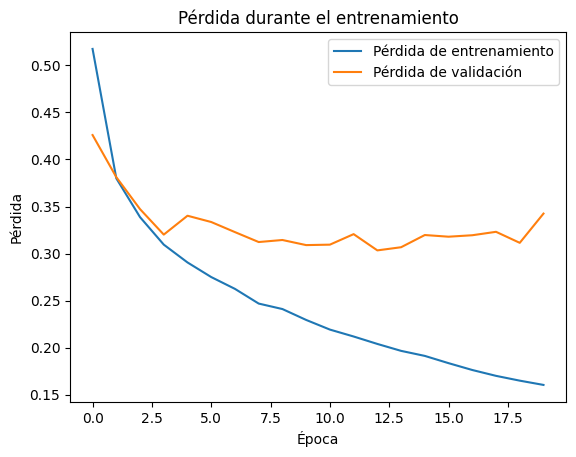

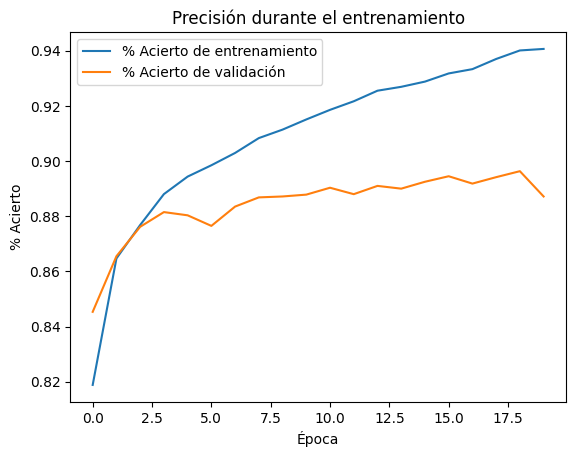

In [42]:
# Definir el modelo de perceptrón multicapa
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Capa de entrada: aplanar la imagen
    Dense(512, activation='relu'),  # Capa oculta: 512 neuronas con activación ReLU/ tanh
    Dense(10, activation='softmax')  # Capa de salida: 10 neuronas con activación Softmax
])

# Compilar el modelo
model.compile(optimizer='adam',  # Optimizador Adam
              loss='sparse_categorical_crossentropy',  # Función de pérdida para clasificación multiclase
              metrics=['accuracy'])  # Métrica de evaluación durante el entrenamiento

# Muestra un resumen de la arquitectura del modelo
model.summary()

# Entrenar el modelo con un conjunto de validación
h = model.fit(train_imagen, train_labels, epochs=20, batch_size=130, verbose=1, validation_split=0.1)

# Evaluar el modelo con los datos de prueba
test_loss, test_acc = model.evaluate(test_imagen, test_labels)
print("Precisión en el conjunto de prueba:", test_acc)
print("Pérdida en el conjunto de prueba:", test_loss)

# Imprimir la pérdida y la precisión para cada época durante el entrenamiento
plt.plot(h.history['loss'], label='Pérdida de entrenamiento')
plt.plot(h.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

plt.plot(h.history['accuracy'], label='% Acierto de entrenamiento')
plt.plot(h.history['val_accuracy'], label='% Acierto de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('% Acierto')
plt.legend()
plt.show()





 * Grafico de Pérdida durante el entrenamiento y la validación: <br>
La línea de pérdida de validación comienza a aumentar mientras la de entrenamiento continúa disminuyendo, esto indica sobreajuste.( esto es indicio de overfitting (memorización de test))<br>
* Precisión durante el entrenamiento y la validación:
Ambas líneas deberían mostrar una tendencia creciente a lo largo de las épocas. La precisión de validación comienza a disminuir y mientras la de entrenamiento continúa aumentando,indica sobreajuste(memorización de test) .

313/313 [==============================] - 1s 4ms/step


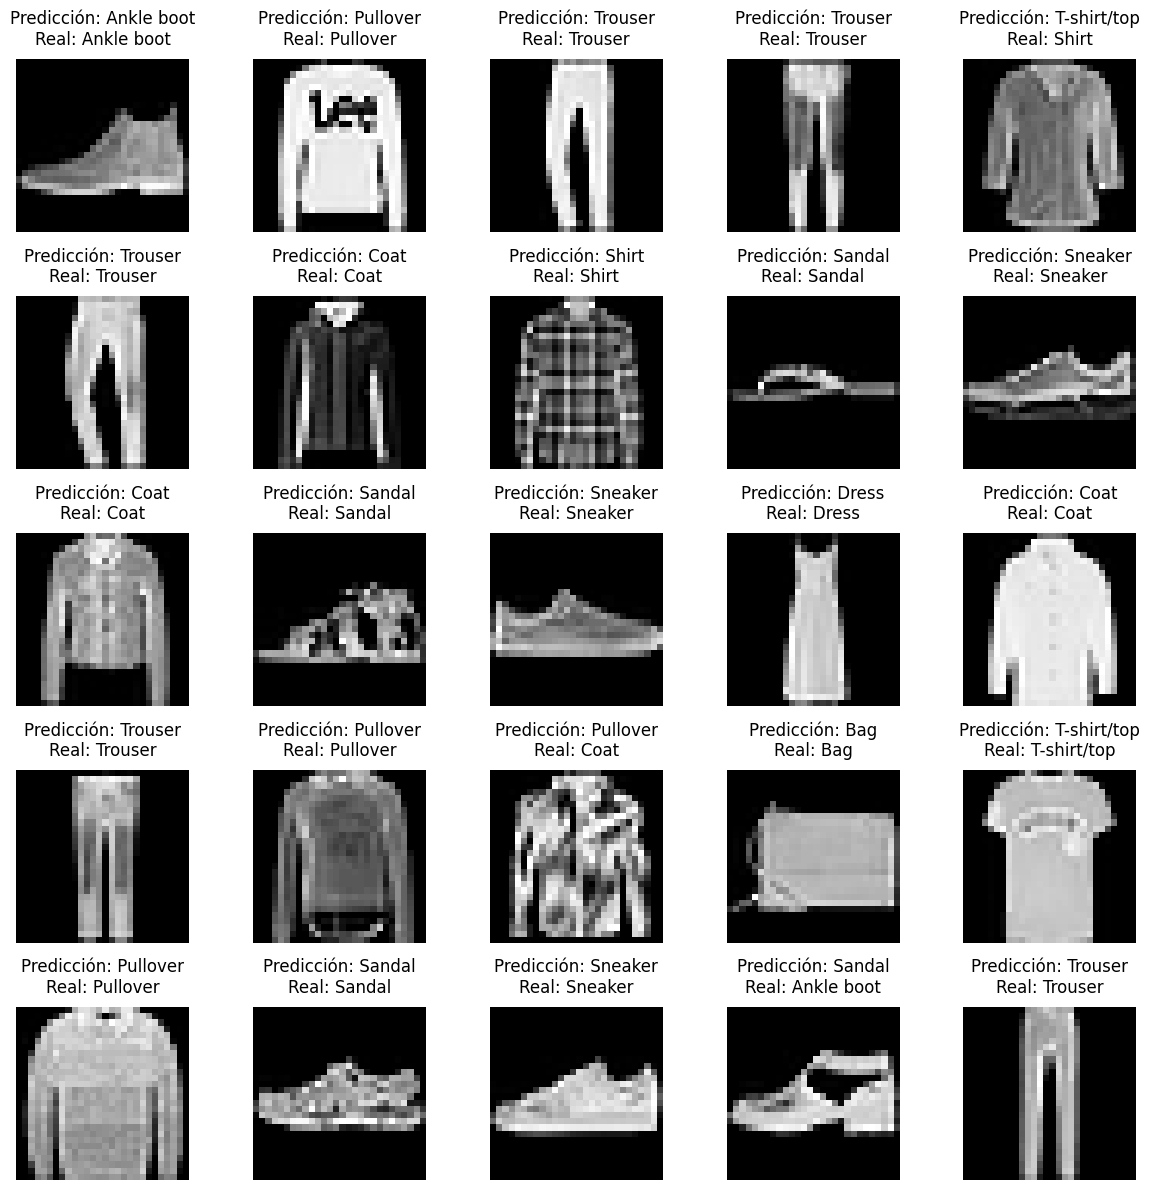

In [43]:
# Hacer predicciones sobre los datos de prueba
predictions = model.predict(test_imagen)

# Convertir las predicciones de probabilidades a etiquetas de clase
predicted_labels = np.argmax(predictions, axis=1)

# Mostrar ejemplos de predicciones junto con las etiquetas reales
plt.figure(figsize=(12, 12))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(test_imagen[i], cmap='gray')
    plt.title(f'Predicción: {clases[predicted_labels[i]]}\nReal: {clases[test_labels[i]]}', pad=10)
    plt.axis('off')
plt.tight_layout()
plt.show()

###DROPOUT Y EARLY STOPPING
Se utilizan Dropout ya que el modelo esta sobreajustado, esta tecnica de regularizacion  previene la dependencia excesiva entre neuronas, evitando que el modelo memorice el ruido los datos de entrenamiento.Mejorando la generalizacion.<br>
Early stopping la usamos porque deteien el entrenamiento antes que se sobreajuste, con esto debiese mejorar el modelo.

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 512)               401920    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_19 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
1688/1688 [==============================] - 15s 8ms/step - loss: 0.5606 - accuracy: 0.8004 - val_loss: 0.4054 - val_accuracy: 0.8505
Epoch

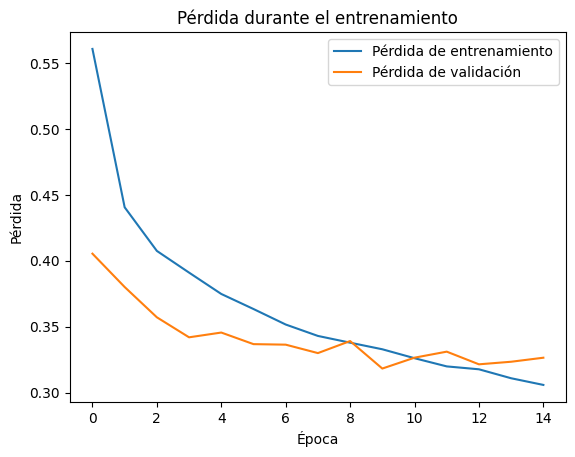

In [46]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Definir el modelo con Dropout
model = Sequential([
    Flatten(input_shape=(28, 28)),            # Aplanar la imagen 28x28 a un vector de 784 elementos
    Dense(512, activation='relu'),            # Capa oculta con 512 perceptrones y activación ReLU
    Dropout(0.5),                              # Capa de dropout con una tasa de dropout del 50%
    Dense(10, activation='softmax')           # Capa de salida con 10 neuronas para las 10 clases y activación softmax
])

# Compilar el modelo
model.compile(optimizer='adam',              # Optimizador Adam
              loss='sparse_categorical_crossentropy',  # Función de pérdida para clasificación multiclase
              metrics=['accuracy'])           # Métrica de precisión

# Mostrar resumen del modelo
model.summary()

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenar el modelo con Dropout y Early Stopping
history = model.fit(train_imagen, train_labels, epochs=20, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

# Evaluar el modelo
test_loss, test_acc = model.evaluate(test_imagen, test_labels)
print('Precisión en los datos de prueba:', test_acc)
print('Pérdida en los datos de prueba:', test_loss)

# Graficar la pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


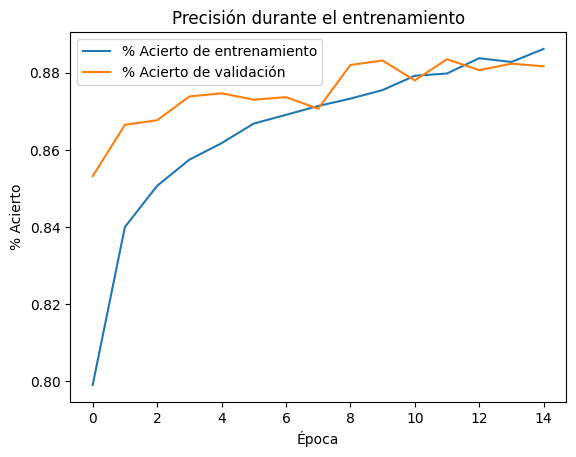

In [25]:
plt.plot(history.history['accuracy'], label='% Acierto de entrenamiento')
plt.plot(history.history['val_accuracy'], label='% Acierto de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('% Acierto')
plt.legend()
plt.show()


313/313 [==============================] - 1s 3ms/step


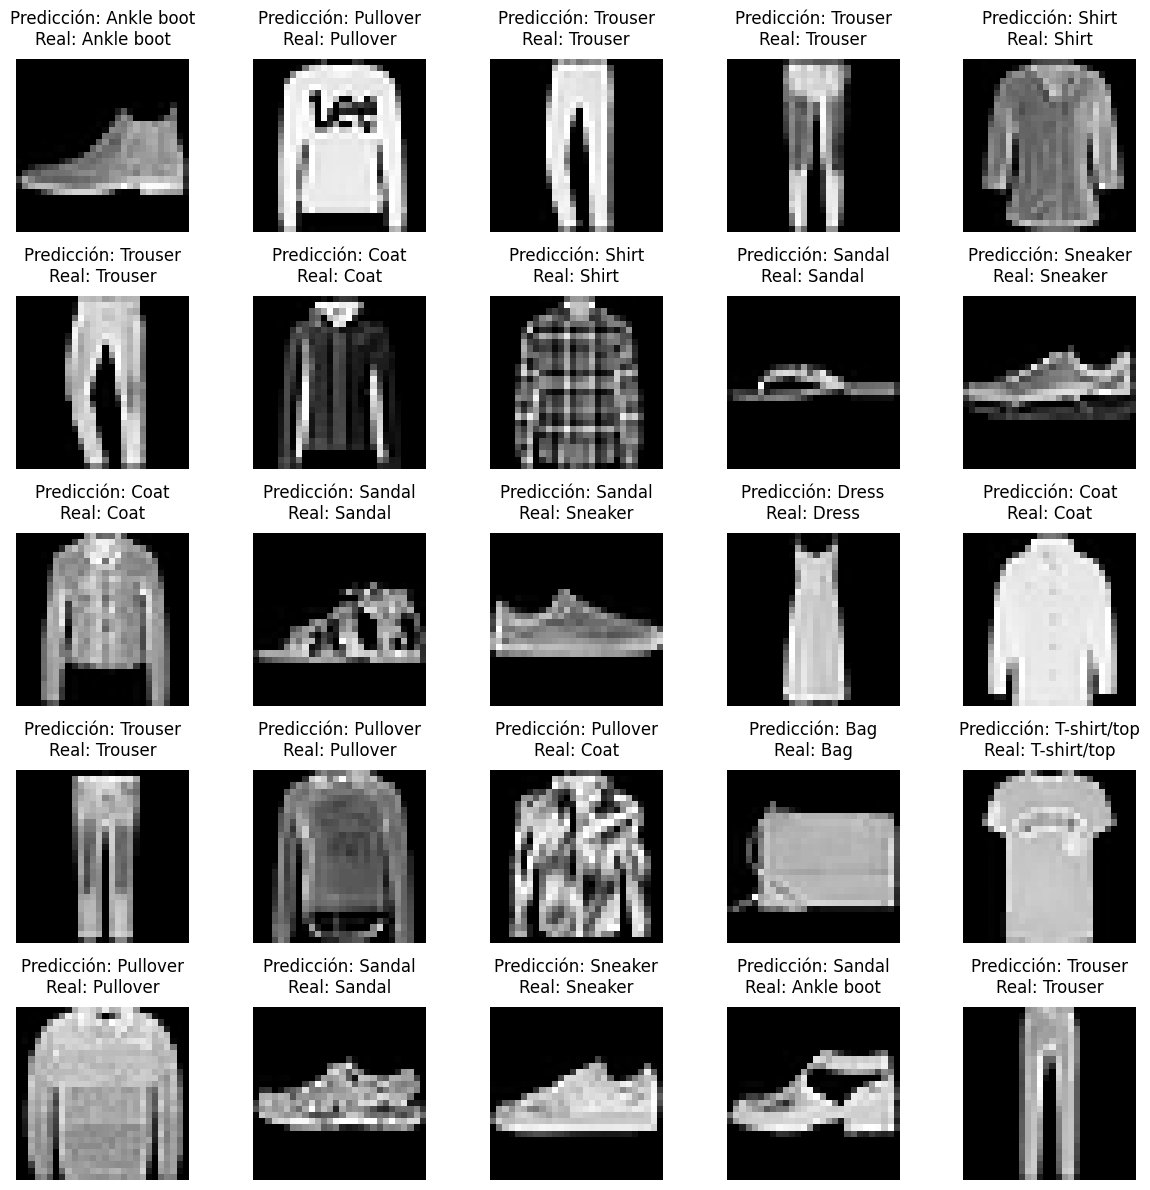

In [47]:
# Hacer predicciones sobre los datos de prueba
predictions = model.predict(test_imagen)

# Convertir las predicciones de probabilidades a etiquetas de clase
predicted_labels = np.argmax(predictions, axis=1)

# Mostrar ejemplos de predicciones junto con las etiquetas reales
plt.figure(figsize=(12, 12))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(test_imagen[i], cmap='gray')
    plt.title(f'Predicción: {clases[predicted_labels[i]]}\nReal: {clases[test_labels[i]]}', pad=10)
    plt.axis('off')
plt.tight_layout()
plt.show()


En resumen, si el modelo con Dropout muestra un mejor comportamiento en términos de sobreajuste en comparación con el modelo sin Dropout, entonces es recomendable utilizar Dropout como una técnica de regularización para mejorar el rendimiento y la generalización del modelo.

## Segundo modelo con una capa y funcion de activacion (tanh)

In [68]:
(imgs_train,labs_train), (imgs_test,labs_test) = keras.datasets.fashion_mnist.load_data()
print(imgs_train.shape)
print(imgs_test.shape)


(60000, 28, 28)
(10000, 28, 28)


In [69]:
(imgs_train,labs_train), (imgs_test,labs_test) = keras.datasets.fashion_mnist.load_data()
print(imgs_train.shape)
print(imgs_test.shape)

# Tranformamos los datos para el entrenamiento,
# Necesitamos transformar tanto el train como el test

X_train = imgs_train.reshape(60000,28*28)
X_test = imgs_test.reshape(10000,28*28)
X_train = X_train / 255
X_test = X_test / 255
print('X', X_train.shape, X_test.shape)

Y_train = keras.utils.to_categorical(labs_train, 10)
Y_test = keras.utils.to_categorical(labs_test, 10)
print('Y', Y_train.shape, Y_test.shape)

# cantidad de ejemplos (train/test), neuronas de entrada y neuronas de salida

M_train = X_train.shape[0]
M_test = X_test.shape[0]

N = X_train.shape[1]
C = Y_train.shape[1]

print(N,C,M_train,M_test)

# Setamos los seed para números random

np.random.seed(30)
tf.random.set_seed(30)


(60000, 28, 28)
(10000, 28, 28)
X (60000, 784) (10000, 784)
Y (60000, 10) (10000, 10)
784 10 60000 10000


In [70]:
# Tranformamos los datos para el entrenamiento,
# Necesitamos transformar tanto el train como el test

X_train = imgs_train.reshape(60000,28*28)
X_test = imgs_test.reshape(10000,28*28)
X_train = X_train / 255
X_test = X_test / 255
print('X', X_train.shape, X_test.shape)

Y_train = keras.utils.to_categorical(labs_train, 10)
Y_test = keras.utils.to_categorical(labs_test, 10)
print('Y', Y_train.shape, Y_test.shape)

X (60000, 784) (10000, 784)
Y (60000, 10) (10000, 10)


In [58]:
# cantidad de ejemplos (train/test), neuronas de entrada y neuronas de salida

M_train = X_train.shape[0]
M_test = X_test.shape[0]

N = X_train.shape[1]
C = Y_train.shape[1]

print(N,C,M_train,M_test)

784 10 60000 10000


In [71]:
# Setamos los seed para números random

np.random.seed(30)
tf.random.set_seed(30)


In [72]:
h1 = 512


 Creamos nuestra red feed-forward con funcion de activacion tanh


In [73]:
# Creamos nuestra red feed-forward
red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='tanh', name='primera_capa'))
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

red.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 primera_capa (Dense)        (None, 512)               401920    
                                                                 
 capa_de_output (Dense)      (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [74]:
red.compile(
    loss='categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

Se determina tamaño de los batch y cantidad de epoca

In [76]:
hist = red.fit(X_train, Y_train,
        epochs=15,
        batch_size=128,
        validation_data=(X_test,Y_test))

Epoch 1/15
469/469 [==============================] - 6s 13ms/step - loss: 0.4133 - accuracy: 0.8508 - val_loss: 0.4248 - val_accuracy: 0.8496
Epoch 2/15
469/469 [==============================] - 6s 12ms/step - loss: 0.3680 - accuracy: 0.8668 - val_loss: 0.3881 - val_accuracy: 0.8571
Epoch 3/15
469/469 [==============================] - 6s 12ms/step - loss: 0.3339 - accuracy: 0.8789 - val_loss: 0.3851 - val_accuracy: 0.8632
Epoch 4/15
469/469 [==============================] - 5s 12ms/step - loss: 0.3191 - accuracy: 0.8826 - val_loss: 0.3678 - val_accuracy: 0.8690
Epoch 5/15
469/469 [==============================] - 7s 14ms/step - loss: 0.3012 - accuracy: 0.8900 - val_loss: 0.3683 - val_accuracy: 0.8666
Epoch 6/15
469/469 [==============================] - 5s 12ms/step - loss: 0.2851 - accuracy: 0.8935 - val_loss: 0.3421 - val_accuracy: 0.8779
Epoch 7/15
469/469 [==============================] - 7s 15ms/step - loss: 0.2733 - accuracy: 0.8983 - val_loss: 0.3365 - val_accuracy: 0.8782

Se infiere que el modelo muestra una pérdida y precisión de entrenamiento significativamente mejores que la pérdida y precisión de validación, ello indica  sobreajuste.

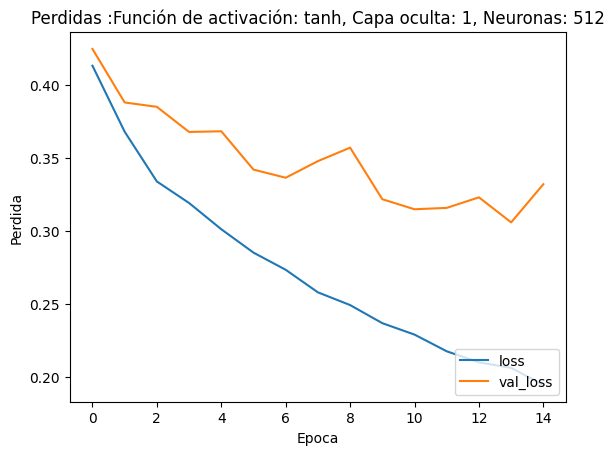

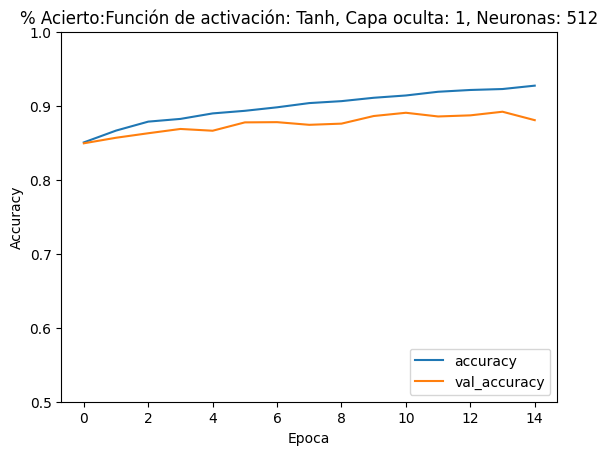

In [77]:
# imprime el porcentaje de acierto para cada época
# Graficar curvas de aprendizaje con función de activación relu
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoca')
plt.ylabel('Perdida')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title("Perdidas :Función de activación: tanh, Capa oculta: 1, Neuronas: 512")
plt.show()
# Graficar curvas de aprendizaje con función de activación relu
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoca')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title("% Acierto:Función de activación: Tanh, Capa oculta: 1, Neuronas: 512")
plt.show()

In [81]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

# Definir el modelo de red neuronal
model = keras.Sequential([
    keras.layers.Dense(512, input_dim=N, activation='tanh'),
    Dropout(0.2),  # Dropout con probabilidad de retener el 80% de las neuronas
    keras.layers.Dense(C, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenar el modelo con Dropout y Early Stopping
history = model.fit(X_train, Y_train, epochs=20, batch_size=128, validation_split=0.1, callbacks=[early_stopping])

# Evaluar el modelo en los datos de prueba
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Precisión en los datos de prueba:', test_acc)
print('Pérdida en los datos de prueba:', test_loss)


Epoch 1/20
422/422 [==============================] - 7s 15ms/step - loss: 0.3545 - accuracy: 0.8973 - val_loss: 0.1997 - val_accuracy: 0.9442
Epoch 2/20
422/422 [==============================] - 6s 14ms/step - loss: 0.2186 - accuracy: 0.9360 - val_loss: 0.1525 - val_accuracy: 0.9538
Epoch 3/20
422/422 [==============================] - 8s 18ms/step - loss: 0.1633 - accuracy: 0.9516 - val_loss: 0.1211 - val_accuracy: 0.9663
Epoch 4/20
422/422 [==============================] - 6s 15ms/step - loss: 0.1273 - accuracy: 0.9616 - val_loss: 0.0998 - val_accuracy: 0.9703
Epoch 5/20
422/422 [==============================] - 8s 19ms/step - loss: 0.1059 - accuracy: 0.9689 - val_loss: 0.0906 - val_accuracy: 0.9742
Epoch 6/20
422/422 [==============================] - 5s 12ms/step - loss: 0.0881 - accuracy: 0.9731 - val_loss: 0.0845 - val_accuracy: 0.9732
Epoch 7/20
422/422 [==============================] - 6s 14ms/step - loss: 0.0760 - accuracy: 0.9759 - val_loss: 0.0787 - val_accuracy: 0.9770

 Se agrega una capa de Dropout con una probabilidad de retener el 80% de las neuronas después de la primera capa oculta y se define Early Stopping para detener el entrenamiento si la pérdida en el conjunto de validación no mejora después de 5 épocas y restaurar los mejores pesos obtenidos durante el entrenamiento.

Se mejora significativamente el modelo .

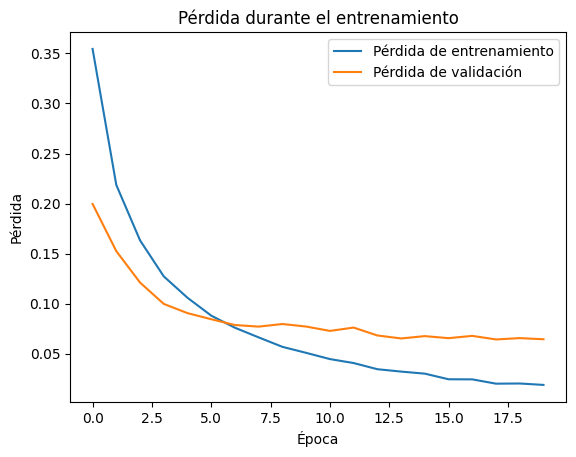

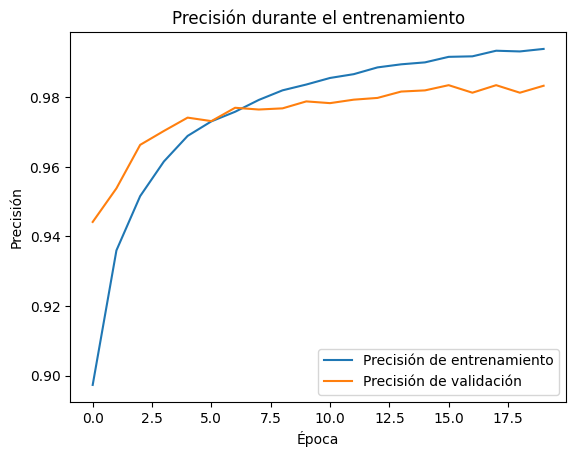

In [83]:
# Graficar la pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Graficar la precisión durante el entrenamiento
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.show()

## Tercer modelo con una capa y funcion activacion (sigmoide)

In [84]:
#definimos las capas y las neuronas por capa oculta
h1 = 512

In [85]:
# Creamos nuestra red feed-forward
red = keras.Sequential()
red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='sigmoid', name='primera_capa_oculta'))
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

In [86]:
# Imprimimos Arquitectura
red.summary()

# Definimos metricas y optimizador
red.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 primera_capa_oculta (Dense  (None, 512)               401920    
 )                                                               
                                                                 
 capa_de_output (Dense)      (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [87]:
# Definimos Batchs y Epocas
hist = red.fit(X_train, Y_train,
        epochs=20,
        batch_size=128,
        validation_data=(X_test,Y_test)
       )

Epoch 1/20
469/469 [==============================] - 6s 11ms/step - loss: 1.9455 - accuracy: 0.5451 - val_loss: 1.6038 - val_accuracy: 0.7347
Epoch 2/20
469/469 [==============================] - 4s 9ms/step - loss: 1.3708 - accuracy: 0.7579 - val_loss: 1.1473 - val_accuracy: 0.7975
Epoch 3/20
469/469 [==============================] - 5s 10ms/step - loss: 1.0248 - accuracy: 0.8072 - val_loss: 0.8890 - val_accuracy: 0.8315
Epoch 4/20
469/469 [==============================] - 6s 13ms/step - loss: 0.8288 - accuracy: 0.8315 - val_loss: 0.7420 - val_accuracy: 0.8508
Epoch 5/20
469/469 [==============================] - 4s 9ms/step - loss: 0.7110 - accuracy: 0.8454 - val_loss: 0.6470 - val_accuracy: 0.8598
Epoch 6/20
469/469 [==============================] - 5s 11ms/step - loss: 0.6341 - accuracy: 0.8544 - val_loss: 0.5842 - val_accuracy: 0.8667
Epoch 7/20
469/469 [==============================] - 4s 9ms/step - loss: 0.5803 - accuracy: 0.8626 - val_loss: 0.5388 - val_accuracy: 0.8724
Ep

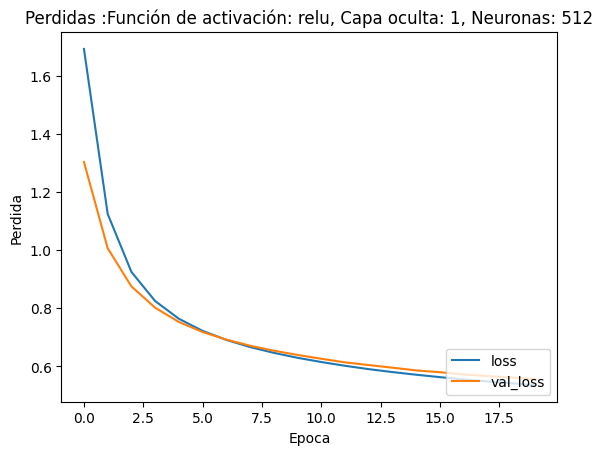

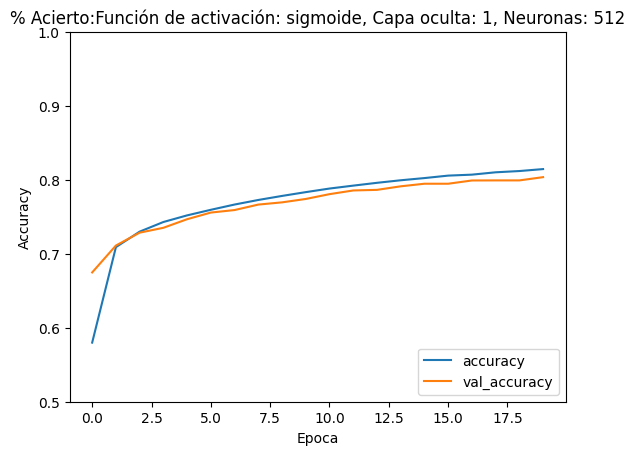

In [ ]:
# imprime el porcentaje de acierto para cada época
# Graficar curvas de aprendizaje con función de activación relu
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoca')
plt.ylabel('Perdida')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title("Perdidas :Función de activación: sigmoid, Capa oculta: 1, Neuronas: 512")
plt.show()
# Graficar curvas de aprendizaje con función de activación relu
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoca')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title("% Acierto:Función de activación: sigmoide, Capa oculta: 1, Neuronas: 512")
plt.show()

Se puede ver que los valores de pérdida y precisión indican que el modelo ha aprendido bien de los datos de entrenamiento y generaliza bien a datos nuevos, ya que tanto la pérdida como la precisión en el conjunto de validación son buenos y comparables a los del conjunto de entrenamiento.

Conclusion : El modelo que utiliza la funcion sigmid con optimizador Adam , es el que mejor generaliza sin realizar dropout y early stopping.<br>


#  MODELOS DE 2 CAPAS OCULTAS

##Primer modelo 2 capas ocultas : funcion activacion( sigmoid , sigmoid)

In [92]:
h1 = 512    # Número de neuronas en la primera capa oculta
h2 = 256    # Número de neuronas en la segunda capa oculta
# Creamos nuestra red feed-forward
red = keras.Sequential()    # Inicializamos un modelo secuencial
red.add(keras.layers.Dense(h1, input_dim=N, activation='sigmoid', name='primera_capa'))    # Añadimos la primera capa oculta con 512 neuronas y activación sigmoidal
red.add(keras.layers.Dense(h2, activation='sigmoid', name='segunda_capa'))    # Añadimos la segunda capa oculta con 256 neuronas y activación sigmoidal
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))    # Añadimos la capa de salida con C neuronas y activación softmax (donde C es el número de clases)
red.summary()    # Mostramos la arquitectura del modelo
red.compile(
    loss='categorical_crossentropy',    # Definimos la función de pérdida como la entropía cruzada categórica
    optimizer='sgd',    # Utilizamos el optimizador SGD (Gradiente Descendente Estocástico)
    metrics=['accuracy']    # Métrica para evaluar el rendimiento del modelo durante el entrenamiento
)

# Entrenamos el modelo con los datos de entrenamiento
hist = red.fit(X_train, Y_train,
        epochs=20,    # Número de épocas de entrenamiento
        batch_size=128,    # Tamaño del lote de datos utilizados en cada iteración del entrenamiento
        validation_data=(X_test,Y_test)    # Datos de validación para evaluar el rendimiento del modelo durante el entrenamiento
       )


Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 primera_capa (Dense)        (None, 512)               401920    
                                                                 
 segunda_capa (Dense)        (None, 256)               131328    
                                                                 
 capa_de_output (Dense)      (None, 10)                2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 7s 13ms/step - loss: 2.2647 - accuracy: 0.2262 - val_loss: 2.2210 - val_accuracy: 0.4527
Epoch 2/20
469/469 [==============================] - 6s 13ms/step - loss: 2.1770 - accuracy: 0.4506 - val_loss: 2.1219 - val_accuracy: 0.

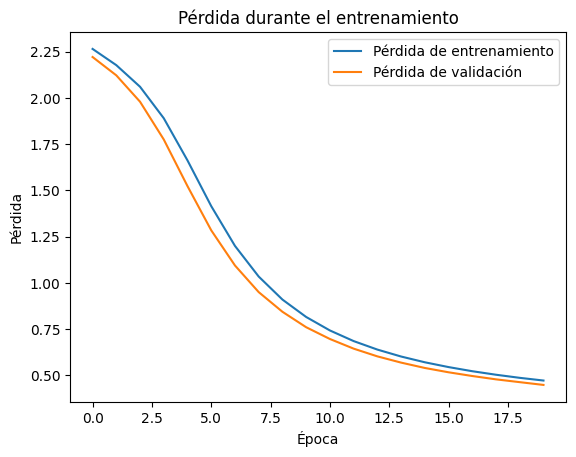

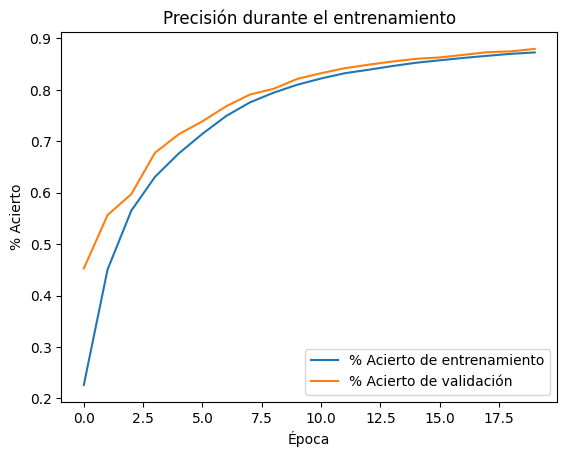

In [93]:
# Imprimir la pérdida y la precisión para cada época durante el entrenamiento
plt.plot(hist.history['loss'], label='Pérdida de entrenamiento')
plt.plot(hist.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

plt.plot(hist.history['accuracy'], label='% Acierto de entrenamiento')
plt.plot(hist.history['val_accuracy'], label='% Acierto de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('% Acierto')
plt.legend()
plt.show()


El modelo ha alcanzado una precisión del 87.29% en los datos de entrenamiento y del 87.97% en los datos de validación. Eso sugiere que el modelo ha aprendido bien de los datos de entrenamiento y generaliza bien a datos nuevos.


## Segundo modelo 2 Capas ocultas Funcion de Activacion:Relu, Relu

In [94]:
# tamaños de capas escondidas
h1 = 512
h2=256
# nuestra red feed-forward

red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
red.add(keras.layers.Dense(h2, activation='relu', name='segunda_capa'))
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

red.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 primera_capa (Dense)        (None, 512)               401920    
                                                                 
 segunda_capa (Dense)        (None, 256)               131328    
                                                                 
 capa_de_output (Dense)      (None, 10)                2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [95]:
 #Ahora compilamos la red para poder entrenar (con .compile)
# Necesitamos definir
#   - la pérdica ("loss"), en nuestro caso, "categorical_crossentropy"
#   - el algoritmo de optimización ("optimizer"), en nuestro caso "sgd"
# También podemos agregar una lista de métrics ("metrics").
# Agregamos "accuracy"

red.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy'])



In [96]:

# Entrenamos simplemente haciendo .fit y entregando los inputs
# Podemos definir también la cantidad de épocas ("epochs"),
# el tamaño del paquete de entrenamiento ("batch_size"),
# y otros parámetros que veremos más adelante.
# Guardamos el resultado en una variable para analizar.

# Definimos Batchs y Epocas
hist = red.fit(X_train, Y_train,
        epochs=20,
        batch_size=128,
        validation_data=(X_test,Y_test)
       )


Epoch 1/20
469/469 [==============================] - 7s 14ms/step - loss: 1.0908 - accuracy: 0.7538 - val_loss: 0.5149 - val_accuracy: 0.8776
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 0.4457 - accuracy: 0.8843 - val_loss: 0.3662 - val_accuracy: 0.9034
Epoch 3/20
469/469 [==============================] - 7s 14ms/step - loss: 0.3571 - accuracy: 0.9013 - val_loss: 0.3171 - val_accuracy: 0.9133
Epoch 4/20
469/469 [==============================] - 7s 15ms/step - loss: 0.3167 - accuracy: 0.9114 - val_loss: 0.2902 - val_accuracy: 0.9189
Epoch 5/20
469/469 [==============================] - 5s 11ms/step - loss: 0.2905 - accuracy: 0.9178 - val_loss: 0.2682 - val_accuracy: 0.9255
Epoch 6/20
469/469 [==============================] - 6s 14ms/step - loss: 0.2708 - accuracy: 0.9233 - val_loss: 0.2533 - val_accuracy: 0.9288
Epoch 7/20
469/469 [==============================] - 5s 11ms/step - loss: 0.2550 - accuracy: 0.9286 - val_loss: 0.2391 - val_accuracy: 0.9336

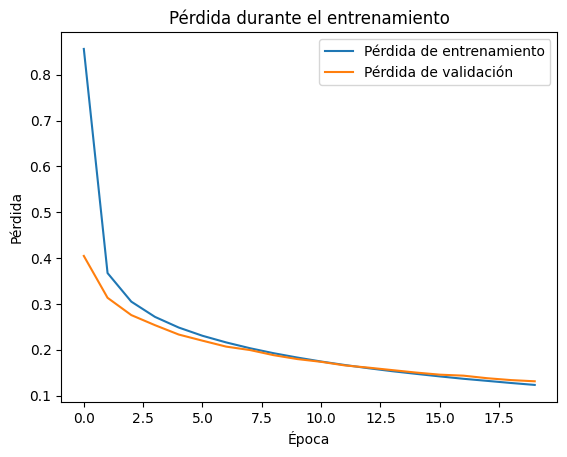

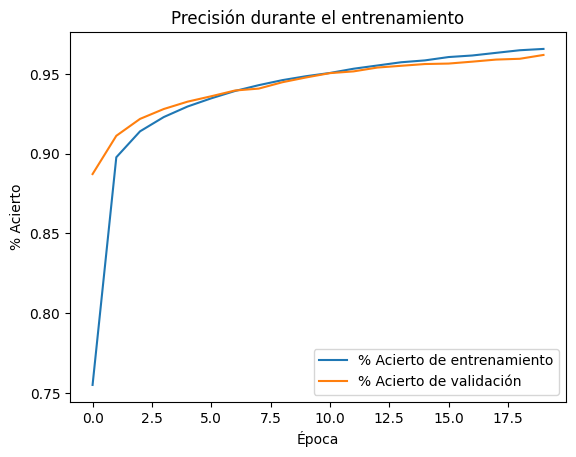

In [ ]:
# Imprimir la pérdida y la precisión para cada época durante el entrenamiento
plt.plot(hist.history['loss'], label='Pérdida de entrenamiento')
plt.plot(hist.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

plt.plot(hist.history['accuracy'], label='% Acierto de entrenamiento')
plt.plot(hist.history['val_accuracy'], label='% Acierto de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('% Acierto')
plt.legend()
plt.show()


 La precisión final en el conjunto de entrenamiento es de aproximadamente 95,77%, mientras que en el conjunto de validación es de alrededor del 95.50%. Esto indica que el modelo es capaz de clasificar correctamente alrededor del 95% de los datos en ambos conjuntos. Una pequeña diferencia entre la precisión del entrenamiento y la validación sugiere que el modelo no está sobreajustando demasiado los datos de entrenamiento.

## Tercer modelo 2 Capas ocultas Funcion de Activacion:Tanh, Relu

In [100]:
h1 = 512    #capaz ocultas ,, 512 numero de perceptron 1024, 512
h2 = 256
# Creamos nuestra red feed-forward

red = keras.Sequential()
red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='tanh', name='primera_capa'))    # funcion de activacion relu, sigmoid,tanh
red.add(keras.layers.Dense(h2, activation='relu', name='segunda_capa'))
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))   # C=numero de clases

red.summary()  # arquitectura

red.compile(
    loss='categorical_crossentropy',
    optimizer='sgd', # Adam
    metrics=['accuracy']
)

hist = red.fit(X_train, Y_train,
        epochs=15,
        batch_size=64,
        validation_data=(X_test,Y_test)
       )


Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 primera_capa (Dense)        (None, 512)               401920    
                                                                 
 segunda_capa (Dense)        (None, 256)               131328    
                                                                 
 capa_de_output (Dense)      (None, 10)                2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/15
938/938 [==============================] - 9s 9ms/step - loss: 0.6856 - accuracy: 0.8322 - val_loss: 0.3602 - val_accuracy: 0.9042
Epoch 2/15
938/938 [==============================] - 7s 8ms/step - loss: 0.3369 - accuracy: 0.9063 - val_loss: 0.2917 - val_accuracy: 0.91

In [ ]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = red.evaluate(X_test, Y_test)

# Imprimir los resultados
print('Pérdida en el conjunto de prueba:', test_loss)
print('Precisión en el conjunto de prueba:', test_accuracy)


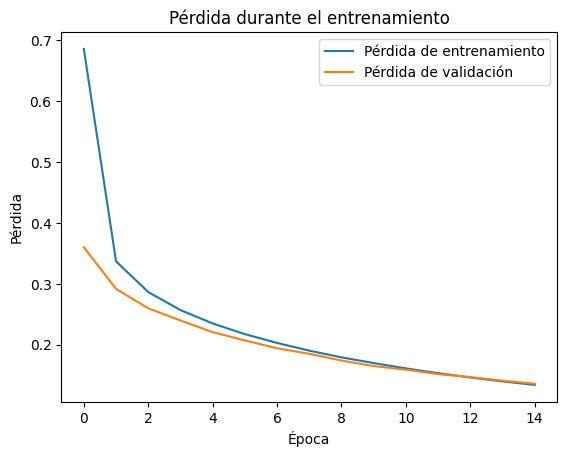

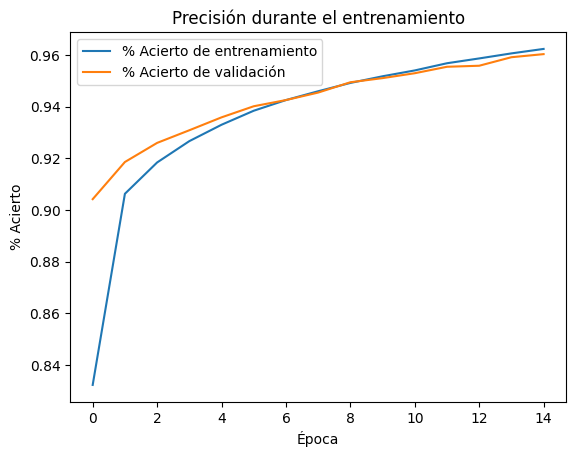

In [102]:
# Imprimir la pérdida y la precisión para cada época durante el entrenamiento
plt.plot(hist.history['loss'], label='Pérdida de entrenamiento')
plt.plot(hist.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

plt.plot(hist.history['accuracy'], label='% Acierto de entrenamiento')
plt.plot(hist.history['val_accuracy'], label='% Acierto de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('% Acierto')
plt.legend()
plt.show()


La pérdida final en el conjunto de entrenamiento es de 0.1340 y en el conjunto de validación es de 0.1360. Estos valores son bajos, lo que indica que el modelo ha minimizado su error durante el entrenamiento y generaliza bien a datos no vistos.

## Se aplica DROPOUT Y EARLY STOPPING

In [104]:
# Definir el modelo con Dropout
red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='tanh', name='primera_capa'))
red.add(Dropout(0.2))  # Agregar Dropout con una tasa de 0.2 (ajustar según sea necesario)
red.add(keras.layers.Dense(h2, activation='relu', name='segunda_capa'))
red.add(Dropout(0.2))  # Agregar Dropout
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

# Agregar Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)  # Detener el entrenamiento si la pérdida de validación deja de disminuir después de 3 épocas

# Compilar el modelo
red.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

# Entrenar el modelo con Dropout y Early Stopping
hist = red.fit(X_train, Y_train,
               epochs=15,
               batch_size=64,
               validation_data=(X_test, Y_test),
               callbacks=[early_stopping])


Epoch 1/15
938/938 [==============================] - 10s 11ms/step - loss: 0.7631 - accuracy: 0.7934 - val_loss: 0.3613 - val_accuracy: 0.9040
Epoch 2/15
938/938 [==============================] - 10s 11ms/step - loss: 0.3839 - accuracy: 0.8893 - val_loss: 0.2907 - val_accuracy: 0.9190
Epoch 3/15
938/938 [==============================] - 13s 14ms/step - loss: 0.3270 - accuracy: 0.9051 - val_loss: 0.2577 - val_accuracy: 0.9289
Epoch 4/15
938/938 [==============================] - 12s 13ms/step - loss: 0.2912 - accuracy: 0.9156 - val_loss: 0.2342 - val_accuracy: 0.9345
Epoch 5/15
938/938 [==============================] - 12s 12ms/step - loss: 0.2659 - accuracy: 0.9220 - val_loss: 0.2158 - val_accuracy: 0.9386
Epoch 6/15
938/938 [==============================] - 10s 11ms/step - loss: 0.2482 - accuracy: 0.9279 - val_loss: 0.2012 - val_accuracy: 0.9421
Epoch 7/15
938/938 [==============================] - 12s 13ms/step - loss: 0.2307 - accuracy: 0.9334 - val_loss: 0.1886 - val_accuracy:

In [105]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = red.evaluate(X_test, Y_test)

# Imprimir los resultados
print('Pérdida en el conjunto de prueba:', test_loss)
print('Precisión en el conjunto de prueba:', test_accuracy)


313/313 [==============================] - 1s 3ms/step - loss: 0.1323 - accuracy: 0.9607
Pérdida en el conjunto de prueba: 0.13232451677322388
Precisión en el conjunto de prueba: 0.9606999754905701


Pérdida en el conjunto de prueba es de 0.1323 , representa la pérdida promedio que el modelo ha tenido en el conjunto de prueba. Este valor es bajo ,entonces  el rendimiento del modelo es bueno, ya que indica que las predicciones del modelo se ajustan mejor a las etiquetas reales.<br>
Precisión en el conjunto de prueba es de 0.9607, indica una alta  precisión del modelo en el conjunto de prueba. Es la fracción de las muestras de prueba correctamente clasificadas por el modelo. El modelo tiene precisión de 0.96 significa que el modelo clasificó correctamente el 96.07% de las muestras de prueba

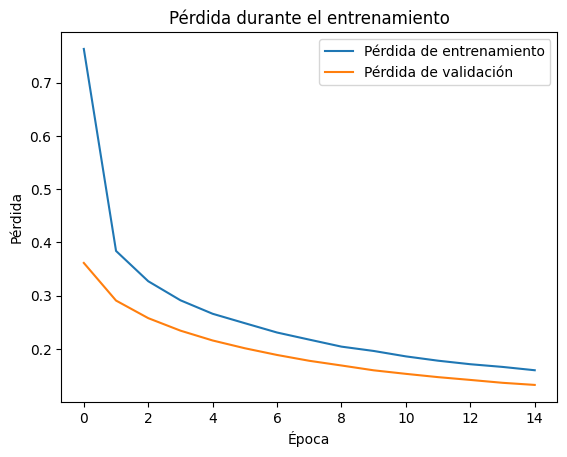

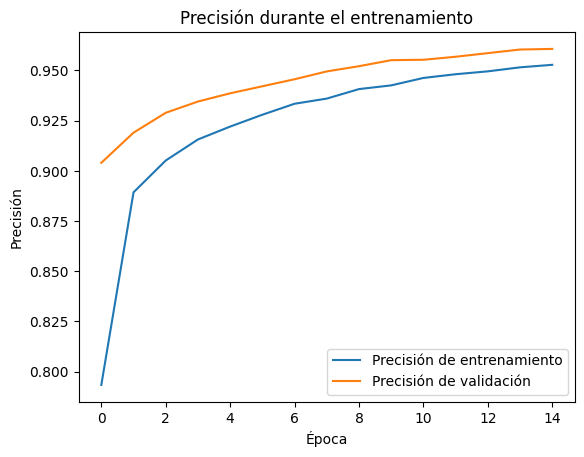

In [106]:
# Graficar pérdida durante el entrenamiento
plt.plot(hist.history['loss'], label='Pérdida de entrenamiento')
plt.plot(hist.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Graficar precisión durante el entrenamiento
plt.plot(hist.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(hist.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.show()


## Diferencia Optimizador de tasa de aprendizaje constante (SGD)y adapatativo (Adam)
Optimizador de tasa de aprendizaje constante mantiene la tasa de aprendizaje fija durante todo el entrenamiento, un optimizador de tasa de aprendizaje adaptativa ajusta la tasa de aprendizaje de forma dinámica y automática según las características del proceso de entrenamiento y los gradientes de los parámetros del modelo. Esto puede llevar a un entrenamiento más eficiente y una convergencia más rápida en algunos casos, especialmente cuando se trabaja con problemas de optimización complejos. Sin embargo, la elección del optimizador depende del problema específico y puede requerir ajuste de hiperparámetros para obtener los mejores resultados.








# MODELO 3 capas ocultas


## Primer  modelo 3 capas : funcion de activacion (relu, relu, relu):
Pérdida en el conjunto de prueba: 0.19663070142269135<br>
Precisión en el conjunto de prueba: 0.9437999725341797

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 primera_capa (Dense)        (None, 512)               401920    
                                                                 
 segunda_capa (Dense)        (None, 256)               131328    
                                                                 
 tercera_capa (Dense)        (None, 128)               32896     
                                                                 
 capa_de_output (Dense)      (None, 10)                1290      
                                                                 
Total params: 567434 (2.16 MB)
Trainable params: 567434 (2.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
172/172 [==============================] - 5s 25ms/step - loss: 1.7947 - accuracy: 0.5480 - val_loss: 1.1698 - val_accuracy: 0.7589
Epoch 

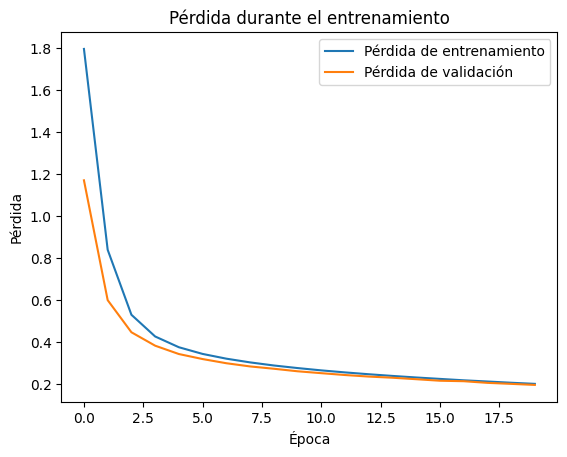

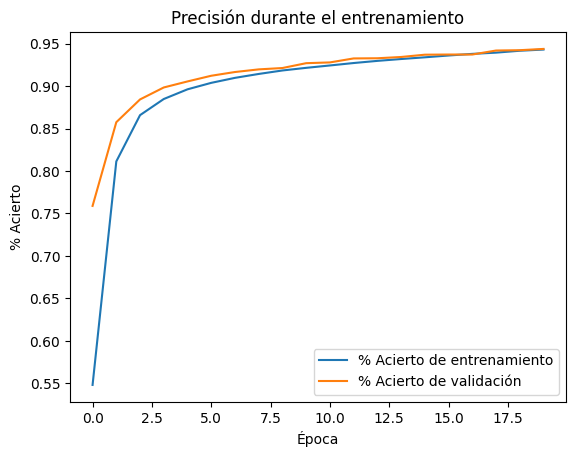

In [107]:
h1 = 512    #capaz ocultas ,, 512 numero de perceptron
h2 = 256
h3= 128
# Creamos nuestra red feed-forward

red = keras.Sequential()
red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))    # funcion de activacion relu
red.add(keras.layers.Dense(h2, activation='relu', name='segunda_capa'))
red.add(keras.layers.Dense(h3, activation='relu', name='tercera_capa'))
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))   # C=numero de clases    # softmax es funcion de activacion  capa de salida
#softmax funcion de salida ,para claficacion, distribucion de probabilidades
red.summary()  # arquitectura

red.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',     # optimizador  ajusatr pesos y bias
    metrics=['accuracy']
)
hist = red.fit(X_train, Y_train,
        epochs=20,
        batch_size=64,
        validation_data=(X_test,Y_test)
       )

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = red.evaluate(X_test, Y_test)

# Imprimir los resultados
print('Pérdida en el conjunto de prueba:', test_loss)
print('Precisión en el conjunto de prueba:', test_accuracy)

# imprime la pérdida para cada época
# Imprimir la pérdida y la precisión para cada época durante el entrenamiento
plt.plot(hist.history['loss'], label='Pérdida de entrenamiento')
plt.plot(hist.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

plt.plot(hist.history['accuracy'], label='% Acierto de entrenamiento')
plt.plot(hist.history['val_accuracy'], label='% Acierto de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('% Acierto')
plt.legend()
plt.show()




Pérdida en el conjunto de prueba: 0.19663070142269135
Precisión en el conjunto de prueba: 0.9437999725341797<br>
 parecen bastante sólidos, especialmente si están relacionados con un modelo entrenado para el conjunto de datos Fashion-MNIST.<br>
 Con una pérdida de aproximadamente 0.1966 en el conjunto de prueba, esto indica que el modelo está haciendo un buen trabajo al minimizar su error al hacer predicciones sobre datos que no ha visto durante el entrenamiento. Una pérdida más baja sugiere una mejor capacidad predictiva del modelo.
Con una precisión de alrededor del 94.38% en el conjunto de prueba, esto significa que el modelo está clasificando correctamente casi el 94.38% de las muestras de prueba. Una precisión tan alta demuestra que el modelo ha aprendido patrones útiles en los datos de Fashion-MNIST.

##Segundo modelo de 3 capas ocultas: funcion de activacion(tanh,tanh,tanh)

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 primera_capa (Dense)        (None, 512)               401920    
                                                                 
 segunda_capa (Dense)        (None, 256)               131328    
                                                                 
 tercera_capa (Dense)        (None, 128)               32896     
                                                                 
 capa_de_output (Dense)      (None, 10)                1290      
                                                                 
Total params: 567434 (2.16 MB)
Trainable params: 567434 (2.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
172/172 [==============================] - 7s 27ms/step - loss: 1.1682 - accuracy: 0.7124 - val_loss: 0.6864 - val_accuracy: 0.8453
Epoch 

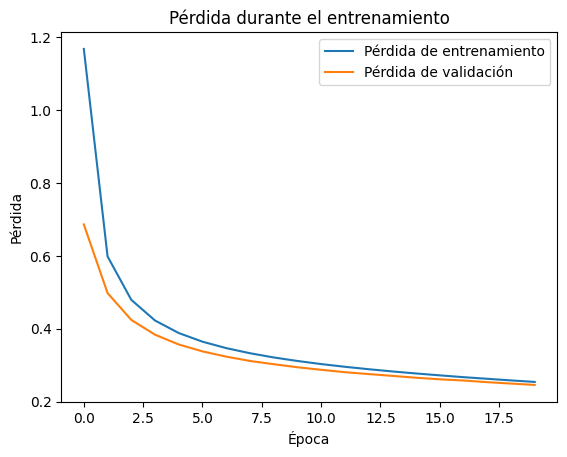

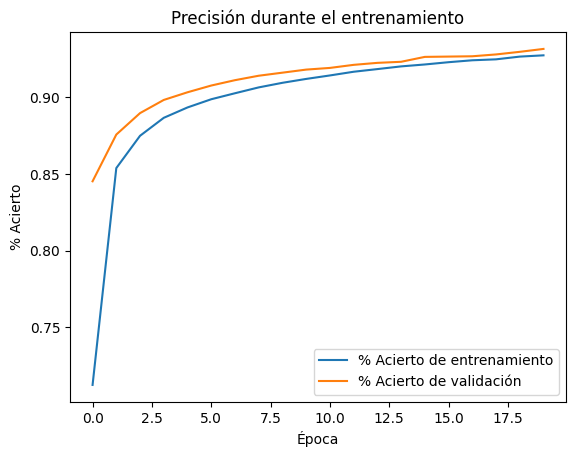

In [109]:
h1 = 512    #capaz ocultas ,, 512 numero de perceptron
h2 = 256
h3= 128
# Creamos nuestra red feed-forward


red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='tanh', name='primera_capa'))    # funcion de activacion relu
red.add(keras.layers.Dense(h2, activation='tanh', name='segunda_capa'))
red.add(keras.layers.Dense(h3, activation='tanh', name='tercera_capa'))
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))   # C=numero de clases

red.summary()  # arquitectura
red.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)
hist = red.fit(X_train, Y_train,
        epochs=20,
        batch_size=350,
        validation_data=(X_test,Y_test)
       )

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = red.evaluate(X_test, Y_test)

# Imprimir los resultados
print('Pérdida en el conjunto de prueba:', test_loss)
print('Precisión en el conjunto de prueba:', test_accuracy)

# imprime la pérdida para cada época
# Imprimir la pérdida y la precisión para cada época durante el entrenamiento
plt.plot(hist.history['loss'], label='Pérdida de entrenamiento')
plt.plot(hist.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

plt.plot(hist.history['accuracy'], label='% Acierto de entrenamiento')
plt.plot(hist.history['val_accuracy'], label='% Acierto de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('% Acierto')
plt.legend()
plt.show()




 Una pérdida de alrededor de 0.2457 en el conjunto de prueba es un valor decente. Indica que el modelo está haciendo un trabajo bastante bueno en la clasificación de imágenes del conjunto de datos de prueba. Sin embargo, una pérdida más baja sería mejor, ya que indicaría una mayor precisión en las predicciones del modelo.<br>
 Una precisión de aproximadamente 93.17% es bastante alta y sugiere que el modelo está clasificando correctamente la gran mayoría de las muestras en el conjunto de prueba. Aunque este valor es muy bueno, se puede mejorar.

##Tercer modelo de 3 capas ocultas : funcion de activacion (sigmoid, relu,sigmoid)

Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 primera_capa (Dense)        (None, 512)               401920    
                                                                 
 segunda_capa (Dense)        (None, 256)               131328    
                                                                 
 tercera_capa (Dense)        (None, 128)               32896     
                                                                 
 capa_de_output (Dense)      (None, 10)                1290      
                                                                 
Total params: 567434 (2.16 MB)
Trainable params: 567434 (2.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 9s 18ms/step - loss: 0.5053 - accuracy: 0.8596 - val_loss: 0.2362 - val_accuracy: 0.9309
Epoch 

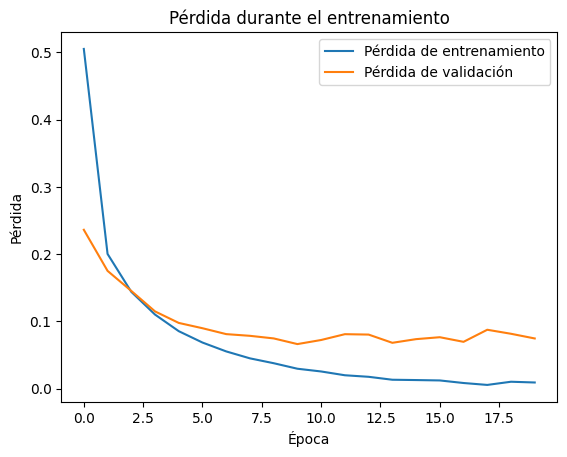

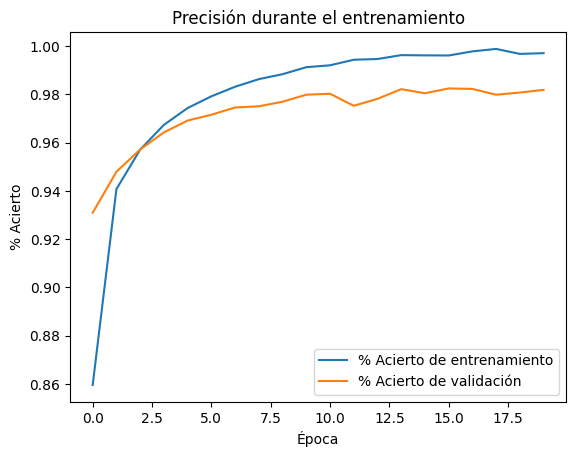

In [111]:
h1 = 512    #capaz ocultas ,, 512 numero de perceptron
h2 = 256
h3= 128
# Creamos nuestra red feed-forward

red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='sigmoid', name='primera_capa'))    # funcion de activacion relu
red.add(keras.layers.Dense(h2, activation='relu', name='segunda_capa'))
red.add(keras.layers.Dense(h3, activation='sigmoid', name='tercera_capa'))
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))   # C=numero de clases

red.summary()  # arquitectura
red.compile(
    loss='categorical_crossentropy',
    optimizer='Adam', # descenso del gradiente   minimo local ,minimo global
    metrics=['accuracy']
)


hist = red.fit(X_train, Y_train,
        epochs=20,
        batch_size=128,
        validation_data=(X_test,Y_test)
       )
# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = red.evaluate(X_test, Y_test)

# Imprimir los resultados
print('Pérdida en el conjunto de prueba:', test_loss)
print('Precisión en el conjunto de prueba:', test_accuracy)

# imprime la pérdida para cada época
# Imprimir la pérdida y la precisión para cada época durante el entrenamiento
plt.plot(hist.history['loss'], label='Pérdida de entrenamiento')
plt.plot(hist.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

plt.plot(hist.history['accuracy'], label='% Acierto de entrenamiento')
plt.plot(hist.history['val_accuracy'], label='% Acierto de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('% Acierto')
plt.legend()
plt.show()


Estos resultados indican que el modelo entrenado con el optimizador Adam ha logrado un excelente rendimiento en la clasificación de imágenes en el conjunto de datos de prueba. Este nivel de precisión y baja pérdida sugiere que el modelo es altamente confiable y eficaz para esta tarea específica

La baja pérdida sugiere que el modelo hace predicciones con una precisión muy alta, con errores mínimos en sus estimaciones. Además, la alta precisión muestra que el modelo clasifica correctamente la gran mayoría de las imágenes en el conjunto de prueba.

###Aplicando DROPOUT Y EARLY STOPPING

Epoch 1/20
469/469 [==============================] - 12s 24ms/step - loss: 0.9124 - accuracy: 0.6994 - val_loss: 0.2784 - val_accuracy: 0.9171
Epoch 2/20
469/469 [==============================] - 9s 19ms/step - loss: 0.3455 - accuracy: 0.9013 - val_loss: 0.1943 - val_accuracy: 0.9428
Epoch 3/20
469/469 [==============================] - 10s 22ms/step - loss: 0.2614 - accuracy: 0.9266 - val_loss: 0.1538 - val_accuracy: 0.9548
Epoch 4/20
469/469 [==============================] - 8s 17ms/step - loss: 0.2175 - accuracy: 0.9383 - val_loss: 0.1315 - val_accuracy: 0.9601
Epoch 5/20
469/469 [==============================] - 9s 19ms/step - loss: 0.1818 - accuracy: 0.9488 - val_loss: 0.1126 - val_accuracy: 0.9668
Epoch 6/20
469/469 [==============================] - 9s 19ms/step - loss: 0.1625 - accuracy: 0.9544 - val_loss: 0.1035 - val_accuracy: 0.9702
Epoch 7/20
469/469 [==============================] - 8s 17ms/step - loss: 0.1435 - accuracy: 0.9593 - val_loss: 0.0956 - val_accuracy: 0.97

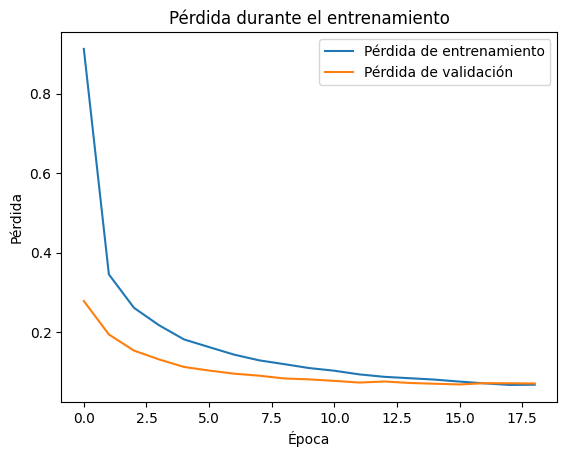

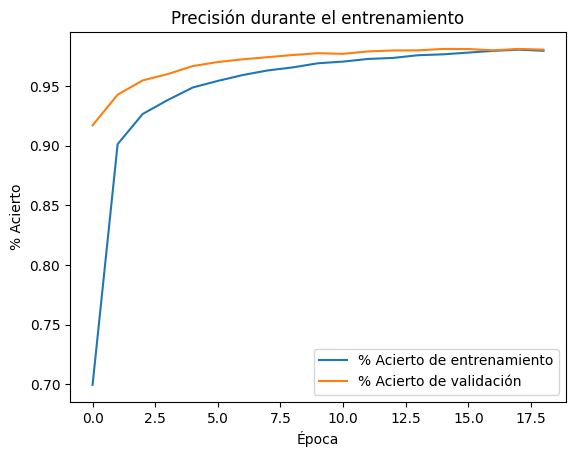

In [112]:

# Definir la arquitectura de la red neuronal
h1 = 512
h2 = 256
h3 = 128
red = Sequential()
red.add(Dense(h1, input_dim=N, activation='sigmoid', name='primera_capa'))
red.add(Dropout(0.5))  # Agregar Dropout después de la primera capa
red.add(Dense(h2, activation='relu', name='segunda_capa'))
red.add(Dropout(0.5))  # Agregar Dropout después de la segunda capa
red.add(Dense(h3, activation='sigmoid', name='tercera_capa'))
red.add(Dropout(0.5))  # Agregar Dropout después de la tercera capa
red.add(Dense(C, activation='softmax', name='capa_de_output'))

# Compilar el modelo
red.compile(
    loss='categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

# Configurar Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

# Entrenar el modelo con Dropout y Early Stopping
hist = red.fit(X_train, Y_train,
               epochs=20,
               batch_size=128,
               validation_data=(X_test, Y_test),
               callbacks=[early_stopping])

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = red.evaluate(X_test, Y_test)

# Imprimir los resultados
print('Pérdida en el conjunto de prueba:', test_loss)
print('Precisión en el conjunto de prueba:', test_accuracy)

# Imprimir la pérdida y la precisión para cada época durante el entrenamiento
plt.plot(hist.history['loss'], label='Pérdida de entrenamiento')
plt.plot(hist.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

plt.plot(hist.history['accuracy'], label='% Acierto de entrenamiento')
plt.plot(hist.history['val_accuracy'], label='% Acierto de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('% Acierto')
plt.legend()
plt.show()


El modelo con Dropout ha logrado una mayor precisión y una pérdida más baja en comparación con el modelo anterior. Esto sugiere que la regularización mediante Dropout ha sido efectiva para mejorar el rendimiento del modelo en la tarea de clasificación de imágenes de Fashion-MNIST.

#Creando redes neuronales con distintos hiperparametros.

modelo: 3 capas ocultas. funcion activacion:tanh,tanh, relu   Optimizador Adam

Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 primera_capa (Dense)        (None, 1024)              803840    
                                                                 
 segunda_capa (Dense)        (None, 512)               524800    
                                                                 
 tercera_capa (Dense)        (None, 256)               131328    
                                                                 
 capa_de_output (Dense)      (None, 10)                2570      
                                                                 
Total params: 1462538 (5.58 MB)
Trainable params: 1462538 (5.58 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
938/938 [==============================] - 33s 34ms/step - loss: 0.2140 - accuracy: 0.9334 - val_loss: 0.1125 - val_accuracy: 0.9660
Epo

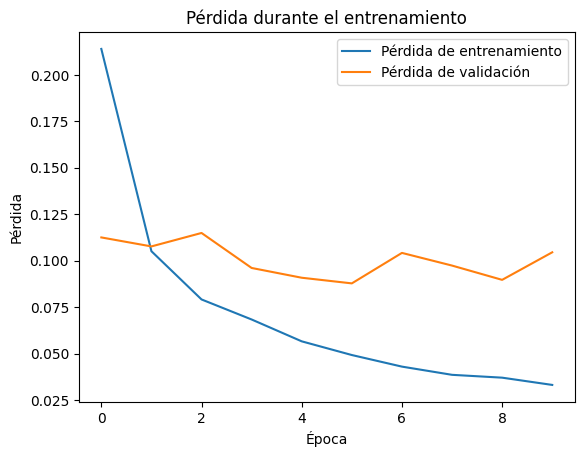

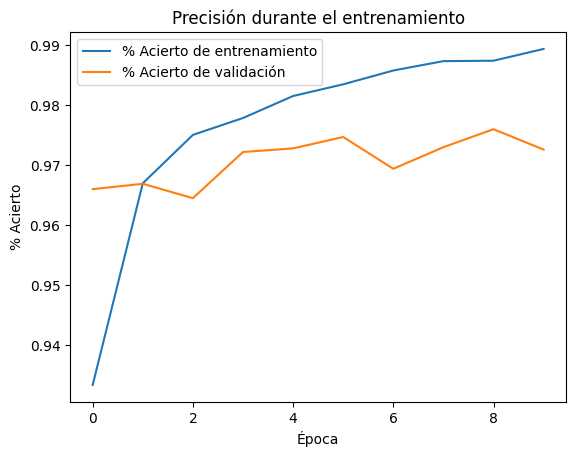

In [113]:
h1 = 1024    #capaz ocultas ,, 512 numero de perceptron
h2 = 512
h3= 256
# Creamos nuestra red

red = keras.Sequential()
red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='tanh', name='primera_capa'))    # funcion de activacion relu
red.add(keras.layers.Dense(h2, activation='tanh', name='segunda_capa'))
red.add(keras.layers.Dense(h3, activation='relu', name='tercera_capa'))
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))   # C=numero de clases

red.summary()  # arquitectura
red.compile(
    loss='categorical_crossentropy',
    optimizer='Adam', # descenso del gradiente   minimo local ,
    metrics=['accuracy']
)
hist = red.fit(X_train, Y_train,
        epochs=10,
        batch_size=64,
        validation_data=(X_test,Y_test)
       )
# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = red.evaluate(X_test, Y_test)

# Imprimir los resultados
print('Pérdida en el conjunto de prueba:', test_loss)
print('Precisión en el conjunto de prueba:', test_accuracy)

# imprime la pérdida para cada época
# Imprimir la pérdida y la precisión para cada época durante el entrenamiento
plt.plot(hist.history['loss'], label='Pérdida de entrenamiento')
plt.plot(hist.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

plt.plot(hist.history['accuracy'], label='% Acierto de entrenamiento')
plt.plot(hist.history['val_accuracy'], label='% Acierto de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('% Acierto')
plt.legend()
plt.show()

Conclusion:<br>
La pérdida de validación comienza a zigzaguear mientras que la pérdida en el entrenamiento sigue disminuyendo, es sobreajuste. Indica que el modelo está memorizando los datos de entrenamiento en lugar de generalizar correctamente.<br>
Otro punto importante para detectar este problema es que los Aciertos de validación comienza a zigzaguear en linea recta mientras que la precisión en el conjunto de entrenamiento sigue aumentando, esto es sobreajuste. Esto significa que el modelo está perdiendo su capacidad de generalización.

##Aplica Dropout al modelo
 Dropout es una técnica de regularización que ayuda a prevenir el sobreajuste durante el entrenamiento, desactivando aleatoriamente algunas unidades durante el entrenamiento para evitar que el modelo dependa demasiado de características específicas.

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 1024)              803840    
                                                                 
 dropout_18 (Dropout)        (None, 1024)              0         
                                                                 
 dense_27 (Dense)            (None, 512)               524800    
                                                                 
 dropout_19 (Dropout)        (None, 512)               0         
                                                                 
 dense_28 (Dense)            (None, 256)               131328    
                                                                 
 dropout_20 (Dropout)        (None, 256)               0         
                                                                 
 dense_29 (Dense)            (None, 10)              

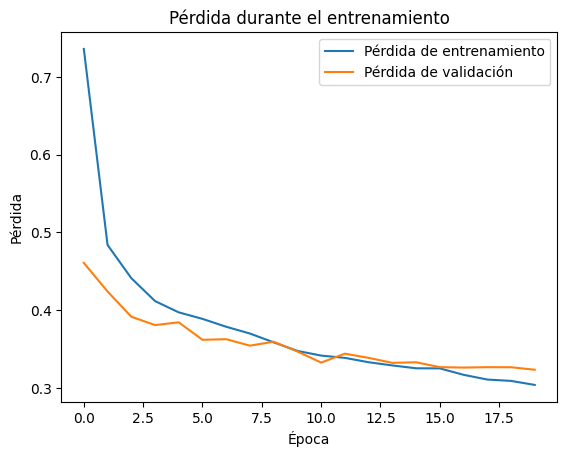

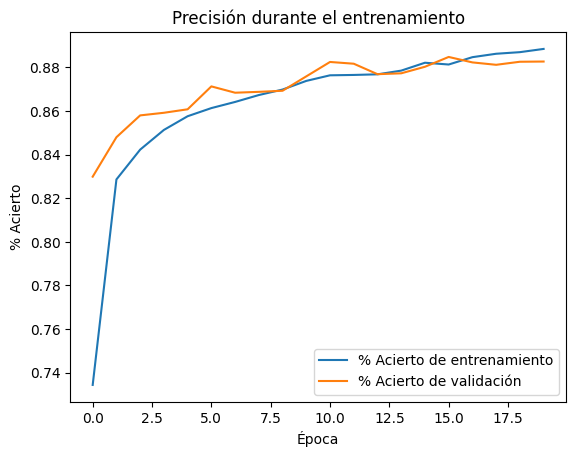

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Definimos el modelo
model = Sequential()

# Primera capa oculta con Dropout
model.add(Dense(1024, activation='relu', input_shape=(784,)))
model.add(Dropout(0.5))  # Dropout del 50%

# Segunda capa oculta con Dropout
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Dropout del 50%

# Tercera capa oculta con Dropout
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Dropout del 50%

# Capa de salida
model.add(Dense(10, activation='softmax'))

# Compilamos el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Imprimimos un resumen del modelo
model.summary()
# Entrenamos el modelo
hist = model.fit(X_train, Y_train, epochs=20, batch_size=300, validation_data=(X_test, Y_test))
# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = red.evaluate(X_test, Y_test)

# Imprimir los resultados
print('Pérdida en el conjunto de prueba:', test_loss)
print('Precisión en el conjunto de prueba:', test_accuracy)

# Gráficos de pérdida y precisión durante el entrenamiento
plt.plot(hist.history['loss'], label='Pérdida de entrenamiento')
plt.plot(hist.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

plt.plot(hist.history['accuracy'], label='% Acierto de entrenamiento')
plt.plot(hist.history['val_accuracy'], label='% Acierto de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('% Acierto')
plt.legend()
plt.show()

#Conclusion Optimizador .
SGD es un optimizador con tasa de aprendizaje constante que actualiza los pesos de la red en la dirección opuesta al gradiente de la función de pérdida, con una tasa de aprendizaje fija especificada por el usuario.En algunos casos, un optimizador con tasa de aprendizaje adaptativa, como Adam o RMSprop, puede ser más adecuado y producir mejores resultados en términos de velocidad de convergencia y estabilidad del entrenamiento.

##Conclusión
 los modelos que utilizaron ReLU como función de activación, Dropout para regularización y Adam como optimizador tuvieron el mejor rendimiento en la clasificación de imágenes de Fashion-MNIST. Esta combinación funcionó muy bien para mejorar la precisión y reducir la pérdida en comparación con otras configuraciones

